In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("benchmark_mh.txt")


def visualize_numerical(test_name, title):
    data = df[df["Test_Name"] == test_name]
    data = data.drop("Test_Name", axis=1)

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(title)

    def set_limits(ax, series):
        margin = series.min() / 10
        lower_bound = max(0, series.min() - margin)
        upper_bound = series.max() + (series.max() * 0.02)
        ax.set_ylim(lower_bound, upper_bound) 

    # Subplot for RMSE Mean
    axs[0].plot(data["Test_Case"], data["RMSE_Mean"], marker="o", color="skyblue")
    axs[0].set_title("RMSE Mean")
    axs[0].set_xlabel("Test Case")
    axs[0].set_ylabel("RMSE Mean")
    set_limits(axs[0], data["RMSE_Mean"])

    # Subplot for MAE Mean
    axs[1].plot(data["Test_Case"], data["MAE_Mean"], marker="o", color="mediumvioletred")
    axs[1].set_title("MAE Mean")
    axs[1].set_xlabel("Test Case")
    axs[1].set_ylabel("MAE Mean")
    set_limits(axs[1], data["MAE_Mean"])

    # Subplot for Computation Time
    axs[2].plot(data["Test_Case"], data["Time"], marker="o", color="yellowgreen")
    axs[2].set_title("Computation Time")
    axs[2].set_xlabel("Test Case")
    axs[2].set_ylabel("Time (Seconds)")
    set_limits(axs[2], data["Time"])

    # Adjust layout
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()


def visualize_categorical(test_name, title):
    data = df[df["Test_Name"] == test_name]
    data = data.drop("Test_Name", axis=1)

    data_T = {
        "Configuration": data["Test_Case"].tolist(),
        "RMSE_Mean": data["RMSE_Mean"].astype(float).tolist(),
        "MAE_Mean": data["MAE_Mean"].astype(float).tolist(),
        "Time": data["Time"].astype(float).tolist(),
    }

    data = pd.DataFrame(data_T)

    def set_limits(ax, series):
        margin = series.min() / 10
        lower_bound = max(0, series.min() - margin)
        upper_bound = series.max() + (series.max() * 0.02)
        ax.set_ylim(lower_bound, upper_bound)

    fig, axs = plt.subplots(
        nrows=1, ncols=3, figsize=(12, 4)
    ) 
    axs = axs.flatten() 
    fig.suptitle(title)

    # Plot each metric
    metrics = ["RMSE_Mean", "MAE_Mean", "Time"]
    colors = [
        "skyblue",
        "mediumvioletred",
        "yellowgreen",
    ] 

    for ax, metric, color in zip(axs, metrics, colors):
        data.plot(
            kind="bar", x="Configuration", y=metric, ax=ax, color=color, legend=False
        )
        ax.set_title(metric)
        ax.set_xlabel("Configuration")
        ax.set_ylabel(metric)
        set_limits(ax, data[metric])

    # Remove empty subplots
    for i in range(len(metrics), len(axs)):
        fig.delaxes(axs[i])

    fig.tight_layout(pad=3.0)
    plt.show()

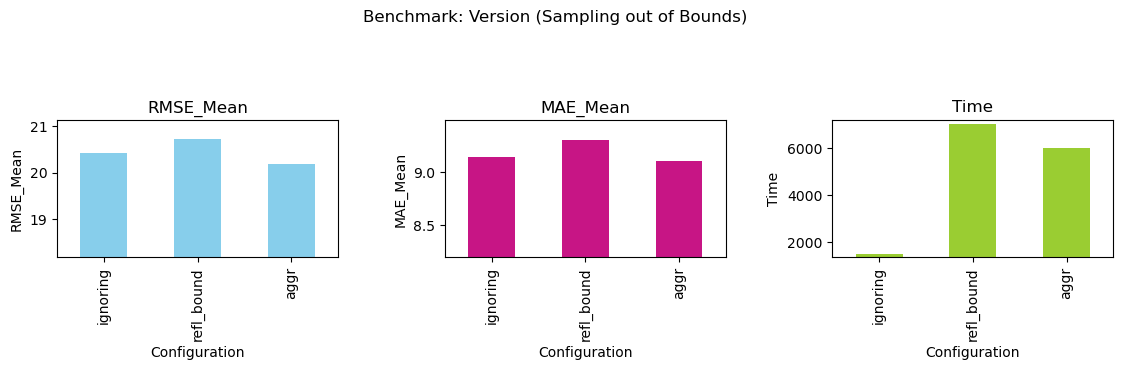

In [15]:
visualize_categorical("sampling_otb", "Benchmark: Version (Sampling out of Bounds)")

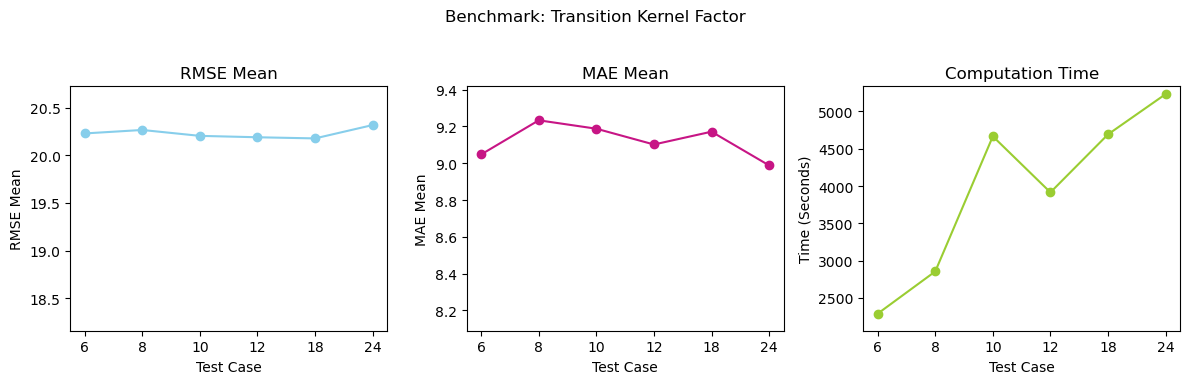

In [16]:
visualize_numerical("sensitivity_transition", "Benchmark: Transition Kernel Factor")

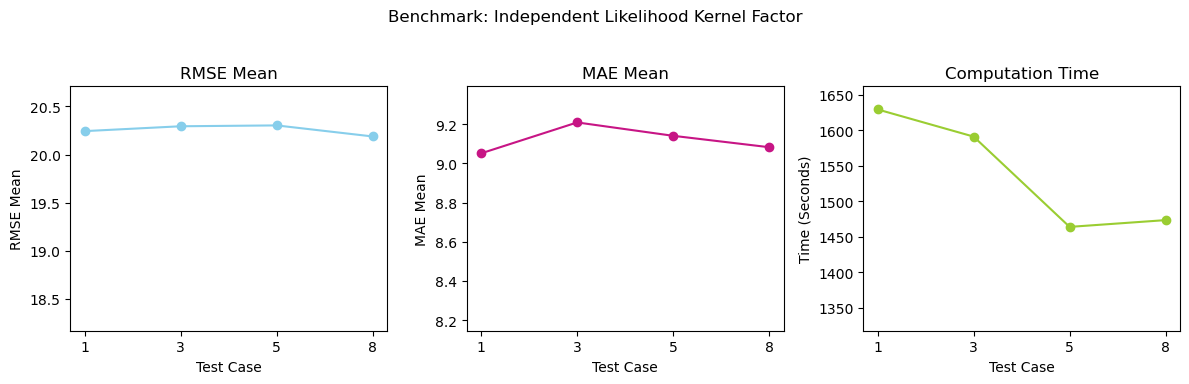

In [17]:
visualize_numerical(
    "sensitivity_likelihood_independent",
    "Benchmark: Independent Likelihood Kernel Factor",
)

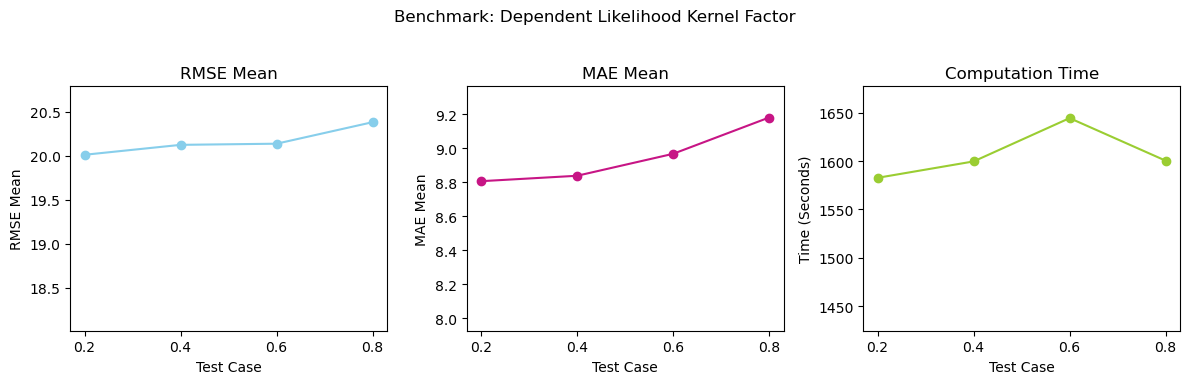

In [18]:
visualize_numerical(
    "sensitivity_likelihood_dependent", "Benchmark: Dependent Likelihood Kernel Factor"
)

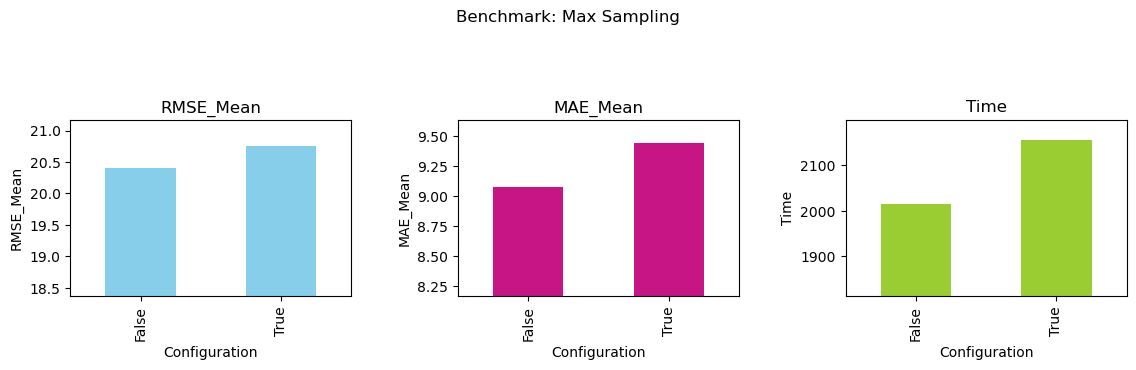

In [19]:
visualize_categorical("max_sampling", "Benchmark: Max Sampling")

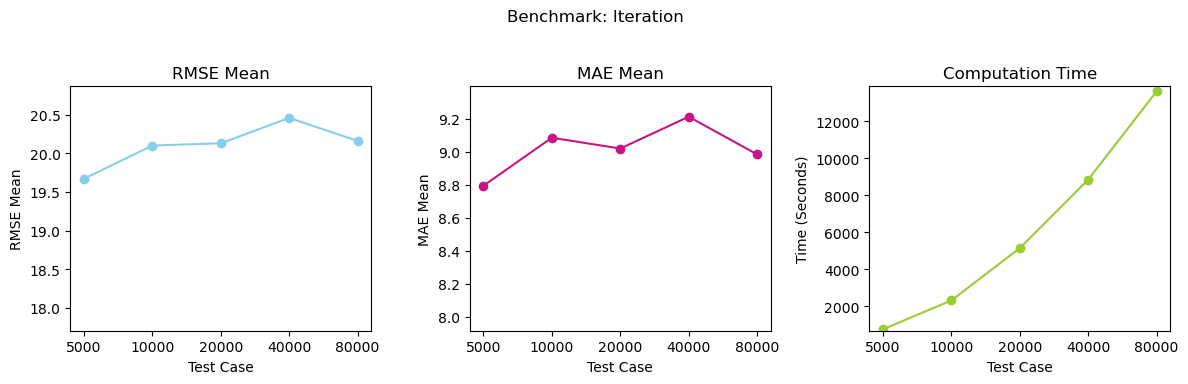

In [20]:
visualize_numerical("iteration", "Benchmark: Iteration")

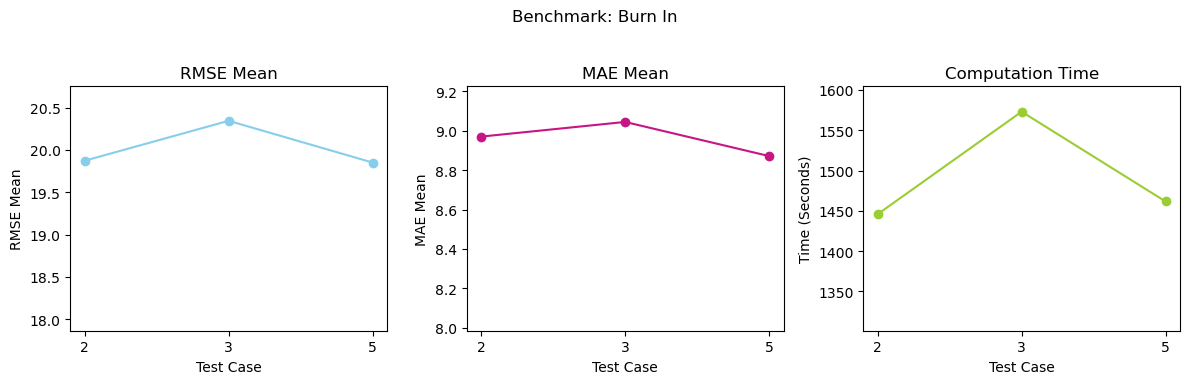

In [21]:
visualize_numerical("burnin_factor", "Benchmark: Burn In")

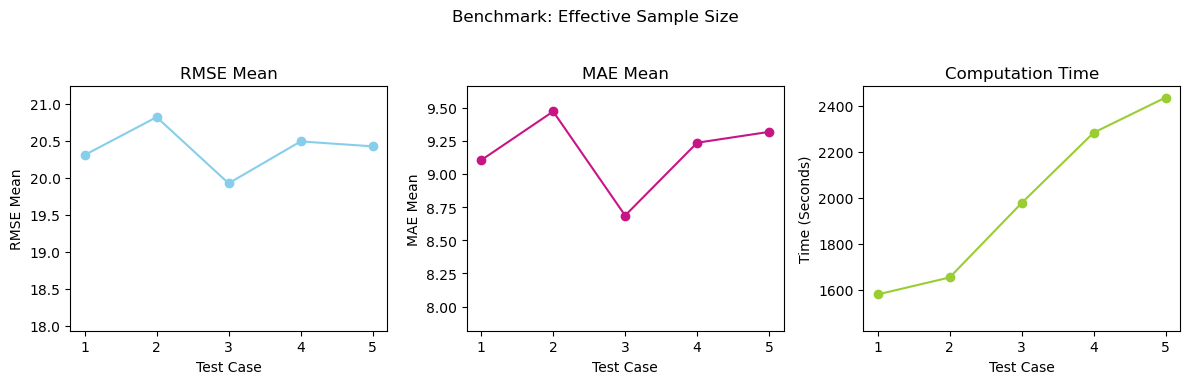

In [22]:
visualize_numerical("effective_sample_size", "Benchmark: Effective Sample Size")

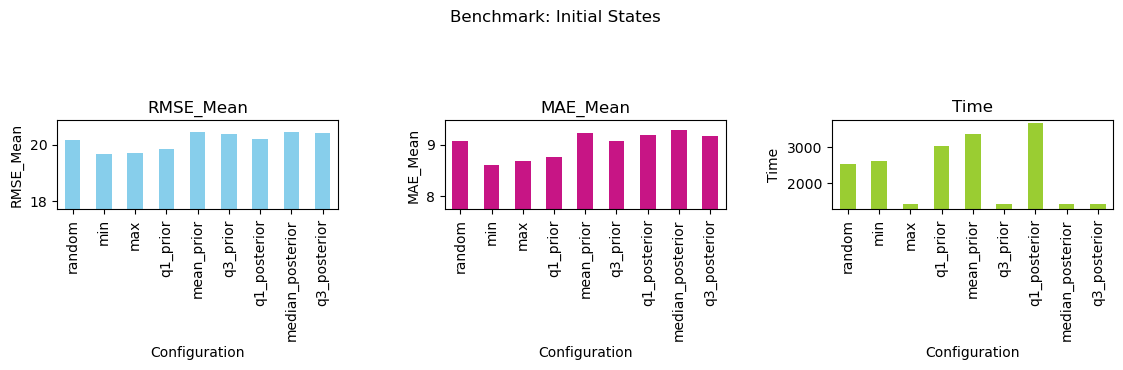

In [23]:
visualize_categorical("init_method", "Benchmark: Initial States")